In [5]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import tqdm

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

     |████████████████████████████████| 195.7 MB 122 kB/s eta 0:00:01    |██████████████▋                 | 89.4 MB 768 kB/s eta 0:02:19     |████████████████████████████████| 195.6 MB 555 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 857 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 701 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 900 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 754 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 1

In [6]:
path = r"C:\Users\Acer\Git\deda_punks\Crypto_punks\bids"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
punks = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            punks.append(file.name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Acer\\Git\\deda_punks\\Crypto_punks\\bids'

In [6]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [297]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [147]:
# load model
model2 = VGG16()
# remove the output layer
model2 = Model(inputs=model2.inputs, outputs=model2.layers[1].output)

img = np.array(img) 
# reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
reshaped_img = img.reshape(1,224,224,3) 
# prepare image for model
imgx = preprocess_input(reshaped_img)
# get the feature vector
features_1 = model2.predict(imgx)

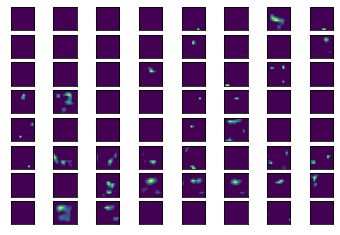

In [296]:
square = 8
ix = 1

for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features_1[0,:,:,ix-1])
        ix +=1
plt.savefig("vgg16_last_layer.png")    

In [151]:
# load model
model2 = VGG16()
# remove the output layer
model2 = Model(inputs=model2.inputs, outputs=model2.layers[17].output)

img = np.array(img) 
# reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
reshaped_img = img.reshape(1,224,224,3) 
# prepare image for model
imgx = preprocess_input(reshaped_img)
# get the feature vector
features_1 = model2.predict(imgx)

In [7]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [8]:
data = {}
p = r"C:\Users\Acer\Git\deda_punks\punks_features_.pkl"

# lop through each image in the dataset
for punk in tqdm.tqdm(punks):
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(punk,model)
        data[punk] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

100%|████████████████████████████████████████████████████████████████████████████████| 908/908 [07:30<00:00,  2.02it/s]


In [124]:
img = load_img(r"C:\Users\Acer\Git\deda_punks\Crypto_punks\bids\Punk 0310.png", target_size=(224,224))

In [126]:
img2 = np.array(img)

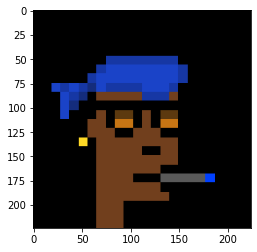

In [127]:
plt.imshow(img2, interpolation=None)

In [128]:
plt.imsave(r'C:\Users\Acer\Git\deda_punks\Punk 0310.png', img2)

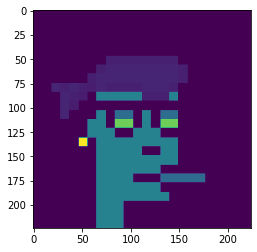

In [132]:
from matplotlib import pyplot as plt
plt.imshow(img2[:,:,0], interpolation=None)
#plt.show()
plt.imsave(r'C:\Users\Acer\Git\deda_punks\R__.png', img2[:,:,0])
#red

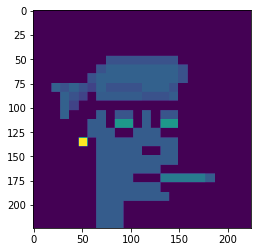

In [130]:
from matplotlib import pyplot as plt
plt.imshow(img2[:,:,1], interpolation=None)
#plt.show()
plt.imsave(r'C:\Users\Acer\Git\deda_punks\G__.png', img2[:,:,1])
#green

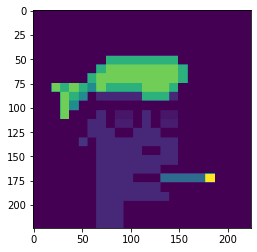

In [131]:
from matplotlib import pyplot as plt
plt.imshow(img2[:,:,2], interpolation=None)
#plt.show()
plt.imsave(r'C:\Users\Acer\Git\deda_punks\B__.png', img2[:,:,2])
#blue

In [61]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
print(feat.shape)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

(908, 1, 4096)
(908, 4096)


In [84]:
pca = PCA(n_components=150, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

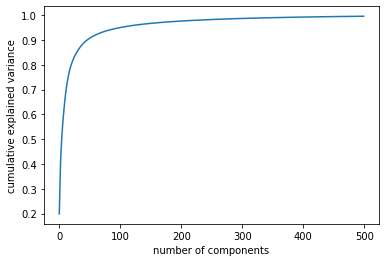

In [133]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig(r"C:\Users\Acer\Git\deda_punks\PCA.png")
# 150 components explain almost 95% of the variance

In [73]:
feat.shape

(908, 4096)

In [236]:
from sklearn.cluster import DBSCAN

In [197]:
from sklearn.cluster import AgglomerativeClustering

In [288]:
from sklearn.cluster import SpectralClustering

In [286]:
clustered = DBSCAN(eps=20, min_samples=4).fit(x)

In [219]:
clustered = AgglomerativeClustering(n_clusters=200, linkage = "average")
clustered.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=200)

In [289]:
clustered = SpectralClustering(n_clusters=200)
clustered.fit(x)

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:289: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  est = KMeans(


SpectralClustering(n_clusters=200)

In [229]:
clustered = KMeans(n_clusters=200, n_jobs=-1)
clustered.fit(x)

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=200, n_jobs=-1)

In [241]:
# holds the cluster id and the images { id: [images] }

def post_process_clustering (model):
    groups = {}
    for file, cluster in zip(filenames,model.labels_):
        if cluster not in groups.keys():
            groups[cluster] = []
            groups[cluster].append(file)
        else:
            groups[cluster].append(file)
    return groups

In [290]:
groups = post_process_clustering(clustered)

In [291]:
from PIL import Image

for i in range(len(groups)):
    #print("Group", i)
    for mini_punk in groups[i]:
        img = Image.open(r"C:\Users\Acer\Git\deda_punks\Crypto_punks\bids\\"+mini_punk)
        #display(img)
        if mini_punk == "Punk 0310.png":
            display(img)
            print("Group", i)
            new_group = i

KeyError: 0

In [292]:
from PIL import Image

for i in range(len(groups)):
    #print("Group", i)
    for mini_punk in groups[i-1]:
        img = Image.open(r"C:\Users\Acer\Git\deda_punks\Crypto_punks\bids\\"+mini_punk)
        #display(img)
        if mini_punk == "Punk 0310.png":
            display(img)
            print("Group", i-1)
            new_group = i-1

KeyError: -1

In [284]:
groups[new_group]

['Punk 0052.png',
 'Punk 0112.png',
 'Punk 0207.png',
 'Punk 0310.png',
 'Punk 0432.png',
 'Punk 0441.png',
 'Punk 0527.png',
 'Punk 0622.png',
 'Punk 0636.png',
 'Punk 0649.png',
 'Punk 0686.png',
 'Punk 0690.png',
 'Punk 0728.png',
 'Punk 0798.png',
 'Punk 0934.png',
 'Punk 1091.png',
 'Punk 1100.png',
 'Punk 1119.png',
 'Punk 1155.png',
 'Punk 1197.png',
 'Punk 1203.png',
 'Punk 1213.png',
 'Punk 1228.png',
 'Punk 1252.png',
 'Punk 1283.png',
 'Punk 1293.png',
 'Punk 1371.png',
 'Punk 1418.png',
 'Punk 1462.png',
 'Punk 1474.png',
 'Punk 1492.png',
 'Punk 1648.png',
 'Punk 1729.png',
 'Punk 1819.png',
 'Punk 1822.png',
 'Punk 1898.png',
 'Punk 1922.png',
 'Punk 1984.png',
 'Punk 2134.png',
 'Punk 2169.png',
 'Punk 2219.png',
 'Punk 2267.png',
 'Punk 2279.png',
 'Punk 2321.png',
 'Punk 2355.png',
 'Punk 2424.png',
 'Punk 2436.png',
 'Punk 2551.png',
 'Punk 2726.png',
 'Punk 2747.png',
 'Punk 2766.png',
 'Punk 2849.png',
 'Punk 2859.png',
 'Punk 3084.png',
 'Punk 3113.png',
 'Punk 315

In [285]:
for mini_punk in groups[new_group]:
    img = Image.open(r"C:\Users\Acer\Git\deda_punks\Crypto_punks\bids\\"+mini_punk)
    display (img)